<a href="https://colab.research.google.com/github/ombystoma-young/BI_ML_2021/blob/hw9_cnn/hw9_cnn/hw9_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Привет!**


## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $\rightarrow(W,H)\leftarrow$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

**Результатом** работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor 

In [ ]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])


M = torch.Tensor(M)
print(M, M.size())

tensor([[0., 1., 2., 0., 1., 2.],
        [3., 4., 5., 3., 4., 5.],
        [6., 7., 8., 6., 7., 8.],
        [0., 1., 2., 0., 1., 2.],
        [3., 4., 5., 3., 4., 5.],
        [6., 7., 8., 6., 7., 8.]]) torch.Size([6, 6])


In [ ]:
def conv(x: Tensor, kernel: Tensor, stride: int, pad: int):
  """
  Reformat image using the kernel operator.
  :param x: two-dimensional array, size (H, W)
  :param kernel: convolution kernel, size (K, K) 
  :param stride: step of convolution kernel, 0 <= stride <= min(W, H)
  :param pad:  x 0-based expansion size (all sides), pad > 0 
  :return activation_map: result of applying convolution, size (H', W')
  where H' = 1 + (H + 2 * pad - K) // stride,
        W' = 1 + (W + 2 * pad - K) // stride  
  """
  h, w = x.size()
  k, _ = kernel.size()
  #padding
  if pad != 0:
    x = F.pad(x, (pad, pad, pad, pad), 'constant', 0)
  # creation of activation map with fixed size
  activation_map = torch.Tensor(size=(1 + (h + 2 * pad - k) // stride, 
                                1 + (w + 2 * pad - k) // stride))
  # sequential filling of the activation map 
  # (i have no idea how to do it in one operation)
  for j in range(activation_map.size()[1]):
    for i in range(activation_map.size()[0]):
      activation_map[i, j] = torch.sum(kernel * x[i : k + i, j : k + j])


  return activation_map

In [ ]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

In [ ]:
print(conv(M, sobel_kernel_vert, stride = 1, pad = 1))
print(conv(M, sobel_kernel_hor, stride = 1, pad = 1))

tensor([[  6.,   6.,  -3.,  -3.,   6.,  -6.],
        [ 16.,   8.,  -4.,  -4.,   8., -16.],
        [ 19.,   8.,  -4.,  -4.,   8., -19.],
        [ 13.,   8.,  -4.,  -4.,   8., -13.],
        [ 16.,   8.,  -4.,  -4.,   8., -16.],
        [ 18.,   6.,  -3.,  -3.,   6., -18.]])
tensor([[ 10.,  16.,  17.,  15.,  16.,  14.],
        [ 18.,  24.,  24.,  24.,  24.,  18.],
        [ -9., -12., -12., -12., -12.,  -9.],
        [ -9., -12., -12., -12., -12.,  -9.],
        [ 18.,  24.,  24.,  24.,  24.,  18.],
        [-10., -16., -17., -15., -16., -14.]])


Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

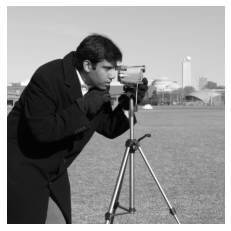

In [ ]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

In [ ]:
camera = Tensor(camera)
camera

tensor([[200., 200., 200.,  ..., 189., 190., 190.],
        [200., 199., 199.,  ..., 190., 190., 190.],
        [199., 199., 199.,  ..., 190., 190., 190.],
        ...,
        [ 25.,  25.,  27.,  ..., 139., 122., 147.],
        [ 25.,  25.,  26.,  ..., 158., 141., 168.],
        [ 25.,  25.,  27.,  ..., 151., 152., 149.]])

In [ ]:
camera_s_hor_filter = conv(camera, sobel_kernel_hor, stride = 1, pad = 1) # результат применения sobel_kernel_hor
plt.imshow(camera_s_hor_filter, cmap="gray", vmin=0, vmax=255)
plt.axis("off");

😮

In [ ]:
camera_s_vert_filter = conv(camera, sobel_kernel_vert, stride = 1, pad = 1) # результат применения sobel_kernel_vert
plt.imshow(camera_s_vert_filter, cmap="gray", vmin=0, vmax=255)
plt.axis("off");

😱

Допишите код ниже и проинтерпретируйте полученный результат:

In [ ]:
# перенесла в ячейку выше.
# и это тоже :)
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255)
plt.axis("off");

🤯




Применение оператора Собеля к изображению позволило выделить границы предметов на изображении (горизонтальный для изменения интенсивности пикселей по x, вертикальный - по оси y).

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [ ]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 10 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os
 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

clear_output()

In [ ]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

clear_output()

In [ ]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)
        
        transformed_img = self._transforms_for_plot(image)
        
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]
        
        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [ ]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)
    
fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

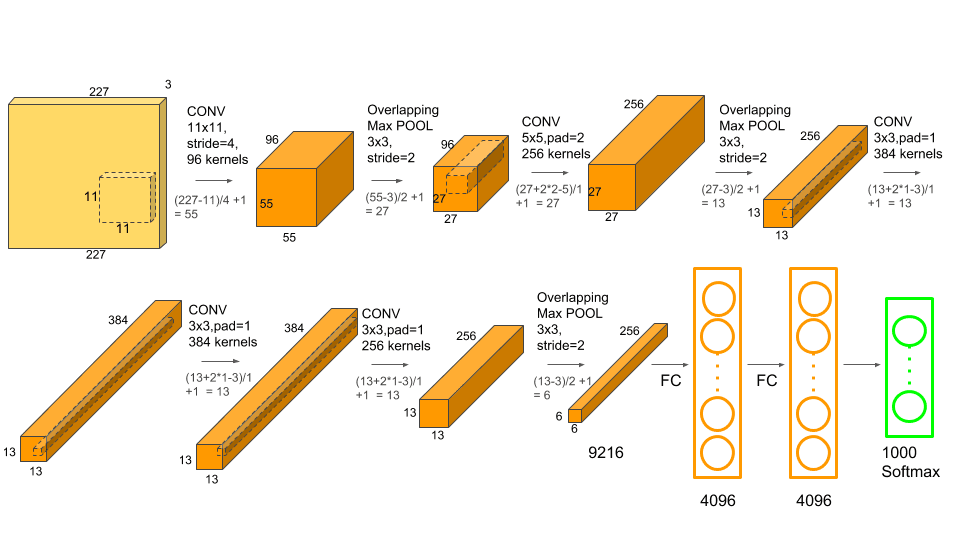

In [ ]:
N_CLASSES = 3 # определите число классов в данных
LEARNING_RATE = 3e-4 # можно подобрать как-то другой)

In [ ]:
from typing import overload
class AlexNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        # CODE IS HERE
        self.n_classes = n_classes
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=96, 
                               kernel_size=11, stride=4, padding=0)
        self.conv_2 = nn.Conv2d(in_channels=96, out_channels=256, 
                                kernel_size=5, stride=1, padding=2)
        self.conv_3 = nn.Conv2d(in_channels=256, out_channels=384, 
                                kernel_size=3, stride=1, padding=1)
        self.conv_4 = nn.Conv2d(in_channels=384, out_channels=384, 
                        kernel_size=3, stride=1, padding=1)
        self.conv_5 = nn.Conv2d(in_channels=384, out_channels=256, 
                        kernel_size=3, stride=1, padding=1)
        
        self.overlapping_max_pooling = nn.MaxPool2d(kernel_size=3, stride=2)

        self.fc_1 = nn.Linear(in_features=6*6*256, out_features=4096)
        self.fc_2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc_3 = nn.Linear(in_features=4096, out_features=n_classes)


    def forward(self,x):
        # CODE IS HERE
        x = F.relu(self.conv_1(x))
        x = self.overlapping_max_pooling(x)
        x = F.relu(self.conv_2(x))
        x = self.overlapping_max_pooling(x)
        x = F.relu(self.conv_3(x))
        x = F.relu(self.conv_4(x))
        x = F.relu(self.conv_5(x))
        x = self.overlapping_max_pooling(x)

        x = torch.flatten(x, 1)

        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        logits = self.fc_3(x)
        probs = F.softmax(logits, dim=1)

        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [ ]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model
    dataloader 
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch + 1}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [ ]:
model = AlexNet(n_classes=N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

17:33:08 --- Epoch: 1	Train loss: 1.0980	Valid loss: 1.0338	Train accuracy: 44.87	Valid accuracy: 45.86
17:33:45 --- Epoch: 2	Train loss: 1.0083	Valid loss: 0.9103	Train accuracy: 66.83	Valid accuracy: 65.41
17:34:25 --- Epoch: 3	Train loss: 0.8619	Valid loss: 0.8645	Train accuracy: 63.93	Valid accuracy: 59.40
17:35:05 --- Epoch: 4	Train loss: 0.7999	Valid loss: 0.7658	Train accuracy: 67.02	Valid accuracy: 66.92
17:35:45 --- Epoch: 5	Train loss: 0.7130	Valid loss: 0.6857	Train accuracy: 73.89	Valid accuracy: 78.95
17:36:25 --- Epoch: 6	Train loss: 0.7170	Valid loss: 0.7483	Train accuracy: 75.63	Valid accuracy: 76.69
17:37:03 --- Epoch: 7	Train loss: 0.6574	Valid loss: 0.6855	Train accuracy: 74.85	Valid accuracy: 68.42
17:37:42 --- Epoch: 8	Train loss: 0.6200	Valid loss: 0.6261	Train accuracy: 76.60	Valid accuracy: 73.68
17:38:20 --- Epoch: 9	Train loss: 0.5587	Valid loss: 0.5742	Train accuracy: 77.47	Valid accuracy: 78.20
17:39:00 --- Epoch: 10	Train loss: 0.5151	Valid loss: 0.4892	Tra

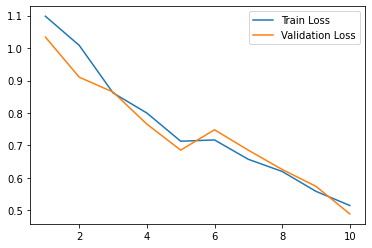

In [ ]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

Похоже на правду. Только, видимо, переобучились...

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

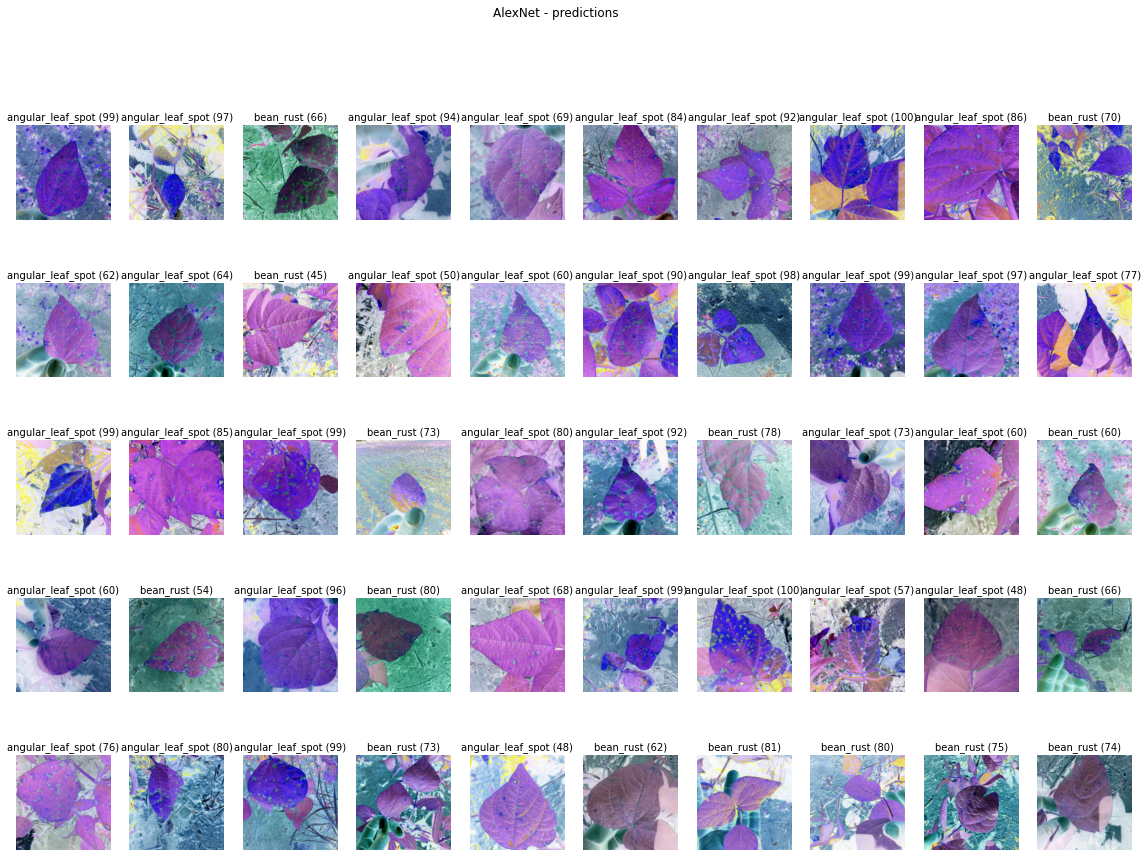

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    # title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

В Википедии на картиночке с описанием указано, что в AlexNet к линейным слоям применяется dropout. Я попробовала это реализовать тоже:

In [ ]:
class AlexNet_d(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        # CODE IS HERE
        self.n_classes = n_classes
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=96, 
                               kernel_size=11, stride=4, padding=0)
        self.conv_2 = nn.Conv2d(in_channels=96, out_channels=256, 
                                kernel_size=5, stride=1, padding=2)
        self.conv_3 = nn.Conv2d(in_channels=256, out_channels=384, 
                                kernel_size=3, stride=1, padding=1)
        self.conv_4 = nn.Conv2d(in_channels=384, out_channels=384, 
                        kernel_size=3, stride=1, padding=1)
        self.conv_5 = nn.Conv2d(in_channels=384, out_channels=256, 
                        kernel_size=3, stride=1, padding=1)
        
        self.overlapping_max_pooling = nn.MaxPool2d(kernel_size=3, stride=2)

        self.fc_1 = nn.Linear(in_features=6*6*256, out_features=4096)
        self.fc_2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc_3 = nn.Linear(in_features=4096, out_features=n_classes)

        self.dropout = nn.Dropout(p=0.5)


    def forward(self,x):
        # CODE IS HERE
        x = F.relu(self.conv_1(x))
        x = self.overlapping_max_pooling(x)
        x = F.relu(self.conv_2(x))
        x = self.overlapping_max_pooling(x)
        x = F.relu(self.conv_3(x))
        x = F.relu(self.conv_4(x))
        x = F.relu(self.conv_5(x))
        x = self.overlapping_max_pooling(x)

        x = torch.flatten(x, 1)

        x = self.dropout(F.relu(self.fc_1(x)))
        x = self.dropout(F.relu(self.fc_2(x)))
        logits = self.fc_3(x)
        probs = F.softmax(logits, dim=1)

        return logits, probs

In [ ]:
model = AlexNet_d(n_classes=N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

17:39:46 --- Epoch: 1	Train loss: 1.0994	Valid loss: 1.0569	Train accuracy: 41.49	Valid accuracy: 44.36
17:40:24 --- Epoch: 2	Train loss: 1.0827	Valid loss: 1.0059	Train accuracy: 54.64	Valid accuracy: 53.38
17:41:01 --- Epoch: 3	Train loss: 1.0169	Valid loss: 1.0594	Train accuracy: 39.17	Valid accuracy: 38.35
17:41:37 --- Epoch: 4	Train loss: 0.9849	Valid loss: 1.0186	Train accuracy: 47.78	Valid accuracy: 47.37
17:42:14 --- Epoch: 5	Train loss: 0.9183	Valid loss: 0.8447	Train accuracy: 63.35	Valid accuracy: 63.91
17:42:52 --- Epoch: 6	Train loss: 0.8082	Valid loss: 1.0625	Train accuracy: 49.23	Valid accuracy: 48.12
17:43:29 --- Epoch: 7	Train loss: 0.8381	Valid loss: 1.3414	Train accuracy: 47.97	Valid accuracy: 44.36
17:44:07 --- Epoch: 8	Train loss: 0.8491	Valid loss: 0.7705	Train accuracy: 67.89	Valid accuracy: 68.42
17:44:43 --- Epoch: 9	Train loss: 0.7103	Valid loss: 0.6840	Train accuracy: 73.79	Valid accuracy: 74.44
17:45:20 --- Epoch: 10	Train loss: 0.6481	Valid loss: 0.6021	Tra

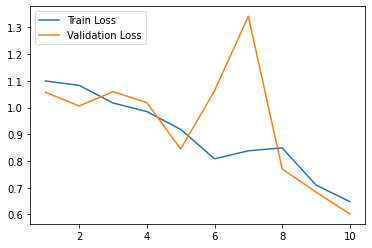

In [ ]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

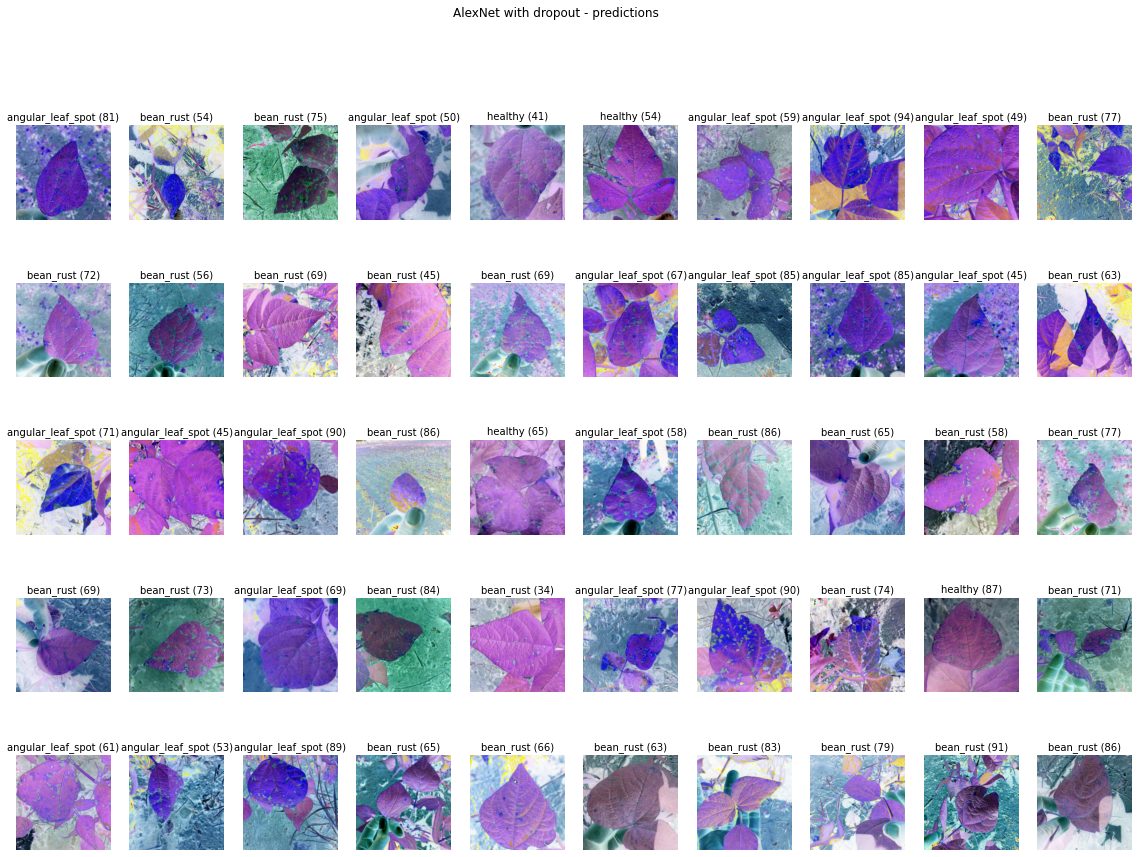

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    #title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)
fig.suptitle('AlexNet with dropout - predictions');

Нет каких-то особых улучшений, может, недостаточно эпох.
Картиночка:


In [ ]:
comparison_list = []
for index in range(45+45+44-1):
  
  class_ = valid_dataset.__getitem__(index, normalize=False)[1]
  with torch.no_grad():
    model.cpu().eval()
    _, probs = model(valid_dataset[index][0].unsqueeze(0))

  pred_class = torch.argmax(probs).item()
  comparison_list.append([class_, pred_class])

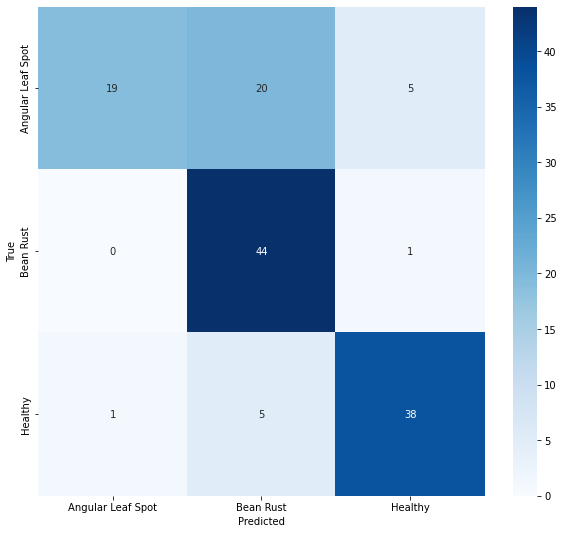

In [ ]:
import pandas as pd

compartion_df = pd.DataFrame(comparison_list)
matrix = np.zeros(shape=(3, 3))
for i in range(3):
  for j in range(3):
    matrix[i, j] = sum(np.logical_and(compartion_df.iloc[:, 0] == i, 
                                      compartion_df.iloc[:, 1] == j))
matrix_port = matrix/ np.size(compartion_df) 
labels = ['Angular Leaf Spot', 'Bean Rust', 'Healthy']

fig = plt.figure(figsize=(10, 9))
s = sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=matrix, cmap="Blues");
s.set(xlabel='Predicted', ylabel='True');

Видно, что классификатор ошибается в определении класса Angular Leaf Spot.  
Я его понимаю.

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

В этот раз тоже как-то не довелось))

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**

Во всём этом обучении нейронных сетей сокрыта какая-то магия.

Классная домашка!

----

Тут немного опечаток:


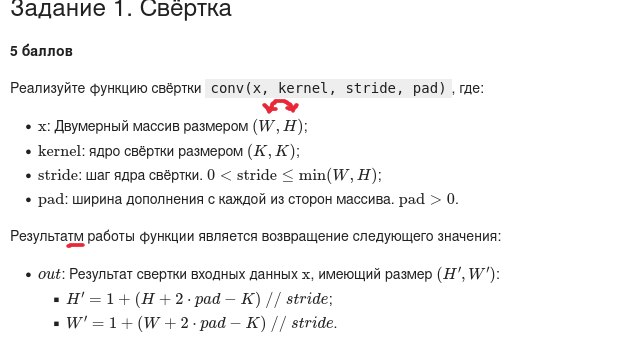